In [1]:
import matplotlib.pyplot as plt

from pyaw.dmsp import SPDF

In [2]:
spdf = SPDF()

In [3]:
fp_s3 = 'D:\cleo\master\pyaw\data\DMSP\ssies3\dmsp-f18_ssies-3_thermal-plasma_201401010124_v01.cdf'  # 一轨
fp_ssm = 'D:\cleo\master\pyaw\data\DMSP\ssm\dmsp-f18_ssm_magnetometer_20140101_v1.0.4.cdf'  # 1天

In [4]:
s3_df = spdf.r_s3(fp_s3)
s3_df_pre = spdf._quality_process(s3_df)

ssm_df = spdf.r_ssm(fp_ssm)
ssm_df_pre = spdf.ssm_pre(ssm_df)

clipped_ssm_df = spdf.clip_ssm_by_ssies3(s3_df_pre, ssm_df_pre)

s3_ssm_df = spdf.get_s3_ssm(s3_df_pre, clipped_ssm_df)

In [5]:
E = spdf.get_E(s3_ssm_df[['v_s3_sc1', 'v_s3_sc2', 'v_s3_sc3']],
           s3_ssm_df[['b_s3_sc_orig1', 'b_s3_sc_orig2', 'b_s3_sc_orig3']])

<Axes: >

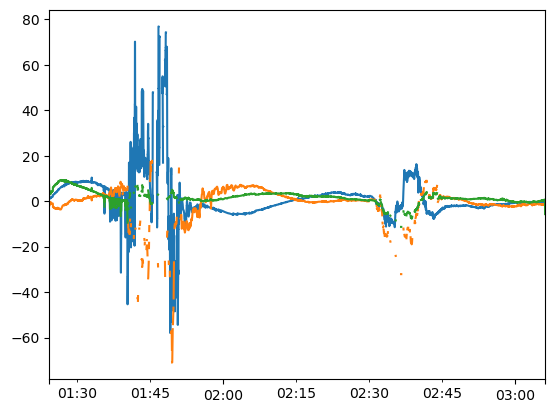

In [6]:
E['1'].plot()
E['2'].plot()
E['3'].plot()

<Axes: xlabel='datetime'>

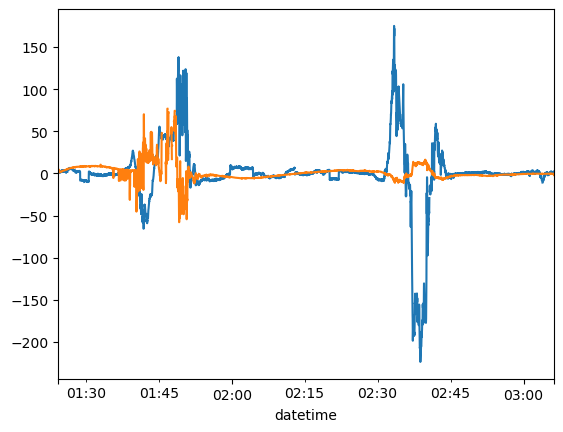

In [8]:
s3_ssm_df['b1_s3_sc2'].plot()
E['1'].plot()

# 同一天多轨

In [8]:
fp_s3 = 'D:\cleo\master\pyaw\data\DMSP\ssies3\dmsp-f18_ssies-3_thermal-plasma_201401010124_v01.cdf'  # 一轨
fns = ['dmsp-f18_ssies-3_thermal-plasma_201401010124_v01.cdf',
       'dmsp-f18_ssies-3_thermal-plasma_201401010306_v01.cdf',
       'dmsp-f18_ssies-3_thermal-plasma_201401010448_v01.cdf',
       'dmsp-f18_ssies-3_thermal-plasma_201401010630_v01.cdf',
       'dmsp-f18_ssies-3_thermal-plasma_201401010812_v01.cdf']
fps_s3 = ["D:/cleo/master/pyaw/data/DMSP/ssies3/" + i for i in fns]

In [9]:
fp_ssm = 'D:\cleo\master\pyaw\data\DMSP\ssm\dmsp-f18_ssm_magnetometer_20140101_v1.0.4.cdf'  # 1天

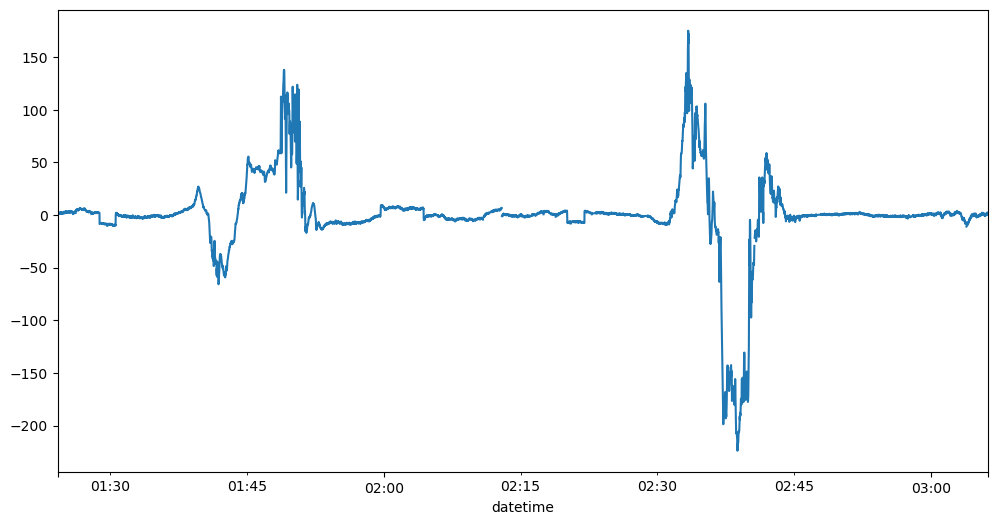

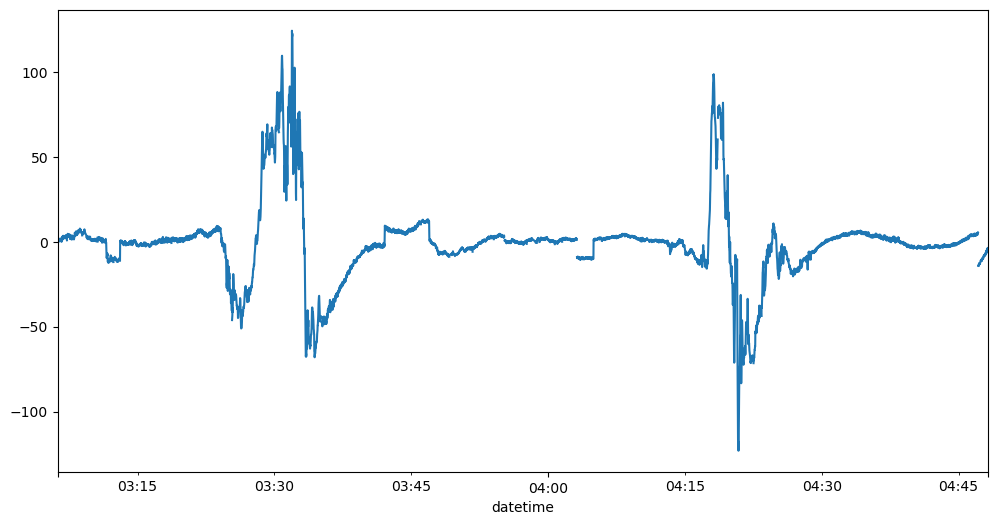

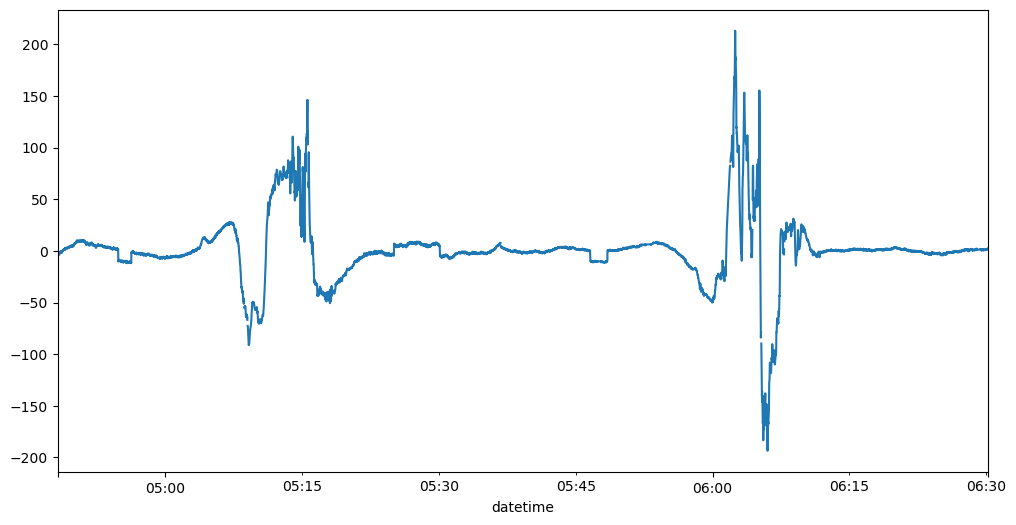

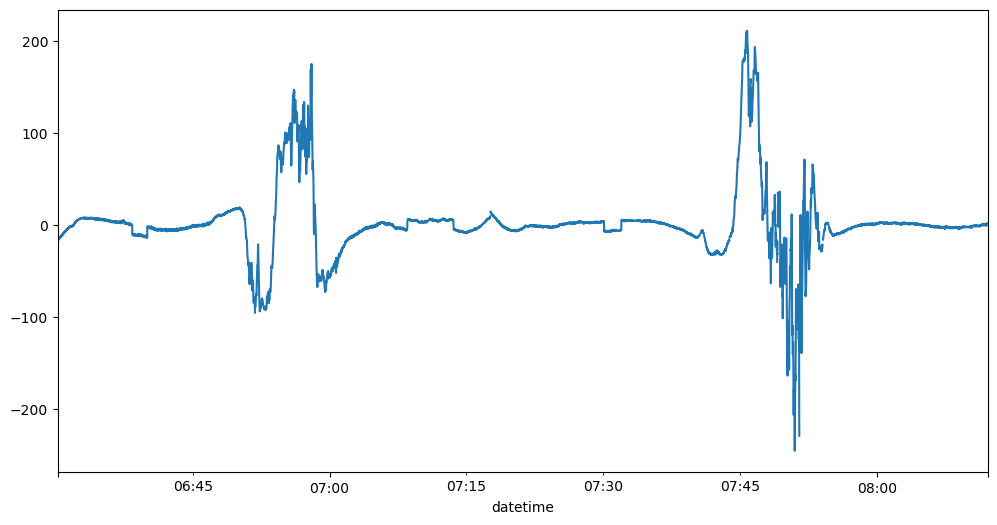

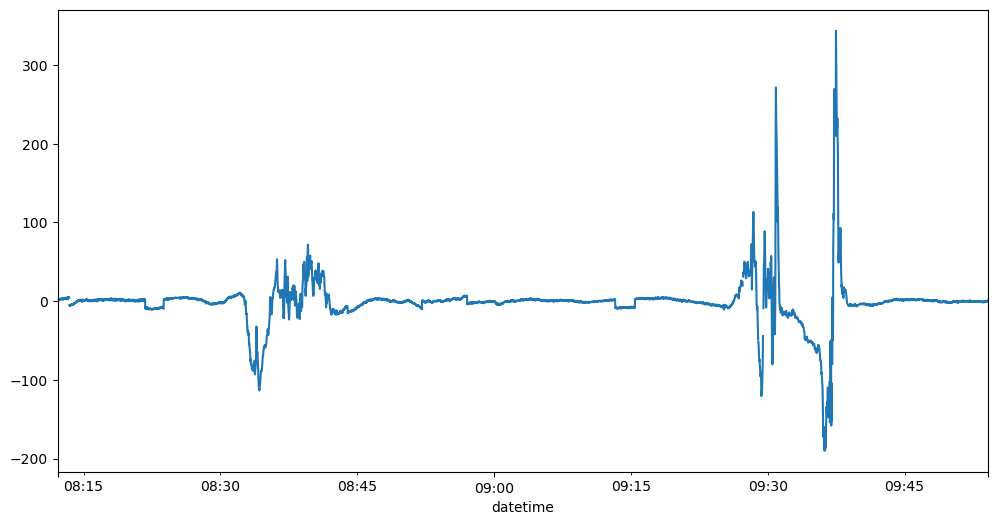

In [10]:
for fp_s3 in fps_s3:
    s3_df = spdf.r_s3(fp_s3)
    s3_df_pre = spdf._quality_process(s3_df)
    ssm_df = spdf.r_ssm(fp_ssm)
    ssm_df_pre = spdf.ssm_pre(ssm_df)
    clipped_ssm_df = spdf.clip_ssm_by_ssies3(s3_df_pre, ssm_df_pre)
    s3_ssm_df = spdf.get_s3_ssm(s3_df_pre, clipped_ssm_df)

    plt.figure(figsize=(12,6))
    s3_ssm_df['b1_s3_sc2'].plot()
    plt.show()

和swarm的特征大致相同